<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Neural_lesson1/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ваша задача методом градієнтного спуску знайти коефіцієнти для задачі регресії. Обираємо метод лінійної регресії та дані про діаманти

In [27]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv",
                 index_col=0)

df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [18]:
y = torch.tensor(df['price'].values, dtype=torch.float32)
x = torch.tensor(df['carat'].values, dtype=torch.float32)

x = x.view(-1, 1)
y = y.view(-1, 1)

coef = torch.tensor([1.0], requires_grad=True)
intercept = torch.tensor([0.0], requires_grad=True)

learning_rate = 1e-4

optimizer = torch.optim.SGD([coef, intercept], lr=learning_rate, momentum=0.9)

for i in range(5000):
    optimizer.zero_grad()
    y_pred = coef * x + intercept
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()
    optimizer.step()

    if i % 500 == 0:
        print(f"Iteration {i}: coef = {coef.item()}, intercept = {intercept.item()}, loss = {loss.item()}")

print(f"Final result: coef = {coef.item()}, intercept = {intercept.item()}, loss = {loss.item()}")

Iteration 0: coef = 1.9760017395019531, intercept = 0.7864003777503967, loss = 31372490.0
Iteration 500: coef = 2645.2548828125, intercept = 1596.72119140625, loss = 8325790.0
Iteration 1000: coef = 3564.034912109375, intercept = 1448.9144287109375, loss = 6478850.0
Iteration 1500: coef = 4124.55908203125, intercept = 1050.6279296875, loss = 5530515.5
Iteration 2000: coef = 4575.71923828125, intercept = 656.2115478515625, loss = 4812595.5
Iteration 2500: coef = 4965.02978515625, intercept = 302.4576721191406, loss = 4259486.0
Iteration 3000: coef = 5305.720703125, intercept = -9.390456199645996, loss = 3833080.25
Iteration 3500: coef = 5604.66943359375, intercept = -283.4101867675781, loss = 3504348.0
Iteration 4000: coef = 5867.12158203125, intercept = -524.0413208007812, loss = 3250917.5
Iteration 4500: coef = 6097.556640625, intercept = -735.3279418945312, loss = 3055538.25
Final result: coef = 6299.50830078125, intercept = -920.4984130859375, loss = 2905175.25


# Результат

In [19]:
coef.item(), intercept.item()

(6299.50830078125, -920.4984130859375)

# Порівняйте результат з sklearn

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = df.drop(columns=['price'])
y_train = df['price']
# тренування
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_[0], model.intercept_

(7756.425617968435, -2256.360580045403)

In [24]:
sklearn_coef = model.coef_[0]
sklearn_intercept = model.intercept_

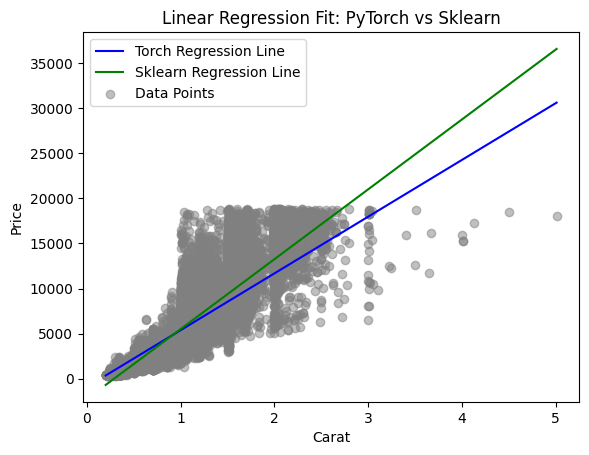

In [28]:
plt.plot(xs.detach().cpu().numpy(), ys_torch.detach().cpu().numpy(), label='Torch Regression Line', color='blue')
plt.plot(xs.detach().cpu().numpy(), ys_sklearn.detach().cpu().numpy(), label='Sklearn Regression Line', color='green')
plt.scatter(df['carat'], df['price'], alpha=0.5, label='Data Points', color='gray')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Fit: PyTorch vs Sklearn')
plt.show()